# 数据集预处理

## 下载数据集

在OpenDataLab官网下载即可

https://opendatalab.com/CIFAR-10

注意：（是.tar.gz文件使用tar -zvxf，之后的.tar文件使用tar -xf解压缩）

In [27]:
!tar vzxf cifar-10-python.tar.gz -C ./data

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1


这个数据库由Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton收集整理。包含了6000张32*32的彩色图像，50000张用于训练，10000张用于测试。主页地址在这里。为了支持循环测试，50000张训练图片又分为5个子集，命名为data_batch_1~5。每个子集都包含正好10000张图片，但有的子集可能包含某个类别的图片多一点，包含其它类别的图片则少一点，但总的来看，每个类别都是正好5000张图片，也就是总共有10个类别

## 反序列化读取文件内容

In [24]:
import pickle as pk
import numpy as np
import os
from matplotlib.pyplot import imread 

def unpickle(file):
    fo = open(file, 'rb')
    dict = pk.load(fo, encoding='latin1')
    fo.close()
    return dict

In [2]:
Xtr = unpickle('./data/cifar-10-batches-py/data_batch_1')
print(Xtr.__class__, Xtr.__doc__)

<class 'dict'> dict() -> new empty dictionary
dict(mapping) -> new dictionary initialized from a mapping object's
    (key, value) pairs
dict(iterable) -> new dictionary initialized as if via:
    d = {}
    for k, v in iterable:
        d[k] = v
dict(**kwargs) -> new dictionary initialized with the name=value pairs
    in the keyword argument list.  For example:  dict(one=1, two=2)


In [25]:
Meta = unpickle('./data/cifar-10-batches-py/batches.meta')
print(Meta.__class__, Meta.__doc__)

<class 'dict'> dict() -> new empty dictionary
dict(mapping) -> new dictionary initialized from a mapping object's
    (key, value) pairs
dict(iterable) -> new dictionary initialized as if via:
    d = {}
    for k, v in iterable:
        d[k] = v
dict(**kwargs) -> new dictionary initialized with the name=value pairs
    in the keyword argument list.  For example:  dict(one=1, two=2)


## 查看batches.meta中的内容

In [104]:
Meta.keys()

dict_keys(['num_cases_per_batch', 'label_names', 'num_vis'])

In [106]:
import types

print(type(Meta['num_cases_per_batch']), type(Meta['label_names']), type(Meta['num_vis']))

<class 'int'> <class 'list'> <class 'int'>


In [115]:
# 每个训练集的batch中包含的图像个数
Meta['num_cases_per_batch']

10000

In [114]:
# 所有类别标签从0-9共10类
Meta['label_names']

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [113]:
# 每张图像的尺寸32*32*3=3072
Meta['num_vis']

3072

## 查看cifar-10-batches-py中训练集的内容

In [14]:
Xtr.keys()

dict_keys(['batch_label', 'labels', 'data', 'filenames'])

In [7]:
len(Xtr['data'])

10000

In [107]:
import types

print(type(Xtr['data']), type(Xtr['labels']), type(Xtr['batch_label']), type(Xtr['filenames']))

<class 'numpy.ndarray'> <class 'list'> <class 'str'> <class 'list'>


In [15]:
Xtr['batch_label']

'training batch 1 of 5'

In [20]:
Xtr['labels'][0:10]

[6, 9, 9, 4, 1, 1, 2, 7, 8, 3]

In [17]:
Xtr['data']

array([[ 59,  43,  50, ..., 140,  84,  72],
       [154, 126, 105, ..., 139, 142, 144],
       [255, 253, 253, ...,  83,  83,  84],
       ...,
       [ 71,  60,  74, ...,  68,  69,  68],
       [250, 254, 211, ..., 215, 255, 254],
       [ 62,  61,  60, ..., 130, 130, 131]], dtype=uint8)

In [19]:
Xtr['filenames'][0:10]

['leptodactylus_pentadactylus_s_000004.png',
 'camion_s_000148.png',
 'tipper_truck_s_001250.png',
 'american_elk_s_001521.png',
 'station_wagon_s_000293.png',
 'coupe_s_001735.png',
 'cassowary_s_001300.png',
 'cow_pony_s_001168.png',
 'sea_boat_s_001584.png',
 'tabby_s_001355.png']

## 打印一张图片

cifar10中图片3*32*32尺寸，但是每个图像的数组['data']中的前32个值表示R通道的像素值，中间32个值表示G通道的像素值，最后32个值表示B通道的像素值，所以需要一些交换像素值的方法使其变成正常图像输出

返回字典类，每个块的文件包含一个字典类，包含以下元素：

data: 一个100003072的numpy数组（unit8）每个行存储3232的彩色图片，3072=1024*3，分别是red, green, blue。存储方式以行为主。

labels:使用0-9进行索引。

数据集包含的另一个文件batches.meta同样包含python字典，用于加载label_names。如：label_names[0] == “airplane”, label_names[1] == “automobile”

In [4]:
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# 获取第一张图片的所有像素值
img1 = Xtr['data'][0]
print(img1)
# 对原始的值进行处理变成RGB的正常形式
img1 = np.reshape(Xtr['data'][0], (3, 32, 32))
print(img1)
print(img1.shape)
# 交换通道顺序使得（3, 32, 32）变成（32, 32, 3）
img1 = img1.transpose(1, 2, 0)
print(img1.shape)

[ 59  43  50 ... 140  84  72]
[[[ 59  43  50 ... 158 152 148]
  [ 16   0  18 ... 123 119 122]
  [ 25  16  49 ... 118 120 109]
  ...
  [208 201 198 ... 160  56  53]
  [180 173 186 ... 184  97  83]
  [177 168 179 ... 216 151 123]]

 [[ 62  46  48 ... 132 125 124]
  [ 20   0   8 ...  88  83  87]
  [ 24   7  27 ...  84  84  73]
  ...
  [170 153 161 ... 133  31  34]
  [139 123 144 ... 148  62  53]
  [144 129 142 ... 184 118  92]]

 [[ 63  45  43 ... 108 102 103]
  [ 20   0   0 ...  55  50  57]
  [ 21   0   8 ...  50  50  42]
  ...
  [ 96  34  26 ...  70   7  20]
  [ 96  42  30 ...  94  34  34]
  [116  94  87 ... 140  84  72]]]
(3, 32, 32)
(32, 32, 3)


## 打印图片具体流程

### 打印单张图片

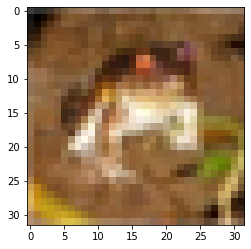

In [6]:
img = np.reshape(Xtr['data'][0], (3, 32, 32))
img = img.transpose(1, 2, 0)
plt.imshow(img)

### 打印一系列图片

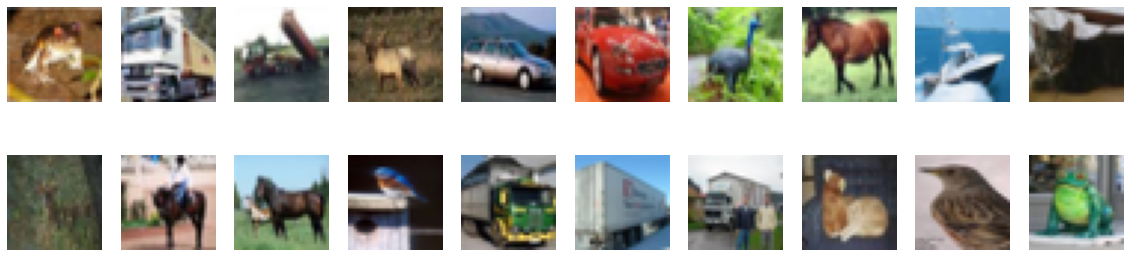

In [7]:
import numpy as np

imgs = Xtr['data']
# 指定图片大小，图像大小为20宽、5高的绘图(单位为英寸inch)
plt.figure(figsize=(20, 5))

# 打印20张图片信息
# enumerate可以同时获取列表的索引和内容
for i, imgs in enumerate(imgs[:20]):
    img = np.reshape(imgs, (3, 32, 32)) # 讲每一行的像素值变成RGB对应形式
    img = img.transpose((1, 2, 0)) # 交换1,3通道
    # img = img * np.array((0.229, 0.224, 0.225)) + np.array((0.485, 0.456, 0.406))# 归一化，里面的数值是约定俗成效果最好的
    # img = img.clip(0, 1) # 图像平滑，小于0的部分变成0，大于1大部分变成1
    # 将整个figure分成2行10列，绘制第i+1个子图。
    plt.subplot(2, 10, i+1)
    plt.imshow(img)
    plt.axis('off')

## 将图像的像素值和文件名对应存储成.jpg图片格式

### 保存单张图片到cifar10_dataset目录下

In [80]:
print(Xtr['batch_label'])
print(type(Xtr['batch_label']))
print(Xtr['batch_label'][15:16])

training batch 1 of 5
<class 'str'>
1


dict_keys(['batch_label', 'labels', 'data', 'filenames'])
batch_label :  1
labels :  6
data :  [ 59  43  50 ... 140  84  72]
filenames :  leptodactylus_pentadactylus_s_000004.png


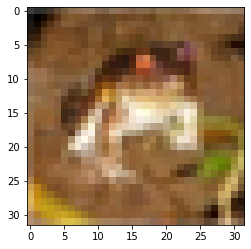

In [99]:
from PIL import Image
import cv2 as cv
import numpy as np

print(Xtr.keys())
for i, index in enumerate(Xtr.keys()):
    if i != 0:
        print(index, ": ", Xtr[f'{index}'][0])
    else:
        print(index, ": ", Xtr[f'{index}'][15:16])
img = np.reshape(Xtr['data'][0], (3, 32, 32))
img = img.transpose(1, 2, 0)
plt.imshow(img)

# pillow保存为.jpg格式图片
img = Image.fromarray(img)
img.save(f"./data/cifar10_dataset/{Xtr['filenames'][0]}.jpg")
# 用cv保存的话默认保存的是BGR的图像，颜色会和正常图像不一样
# cv.imwrite(f"./data/cifar10_dataset/{Xtr['filenames'][0]}.jpg", img)

### 打印保存图片

(32, 32, 3)


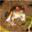

In [98]:
# 用pillow读取一张图片
img_pil = Image.open(f"./data/cifar10_dataset/{Xtr['filenames'][0]}.jpg")
print(np.array(img_pil).shape)
img_pil

### 保存data_batch_1中所有图像到对应类别文件夹下

In [ ]:
!mkdir data/cifar10_dataset/train

In [16]:
from PIL import Image
import numpy as np
import pandas as pd
from tqdm import tqdm
import math
import matplotlib.pyplot as plt
%matplotlib inline
classes = Meta['label_names']
print(classes)

for i in range(Meta['num_cases_per_batch']-9990):
    for j, index in enumerate(Xtr.keys()):
        if j != 0:
            print(index, ": ", Xtr[f'{index}'][i])
        else:
            print(index, ": ", Xtr[f'{index}'][15:16])

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
batch_label :  1
labels :  6
data :  [ 59  43  50 ... 140  84  72]
filenames :  leptodactylus_pentadactylus_s_000004.png
batch_label :  1
labels :  9
data :  [154 126 105 ... 139 142 144]
filenames :  camion_s_000148.png
batch_label :  1
labels :  9
data :  [255 253 253 ...  83  83  84]
filenames :  tipper_truck_s_001250.png
batch_label :  1
labels :  4
data :  [28 37 38 ... 28 37 46]
filenames :  american_elk_s_001521.png
batch_label :  1
labels :  1
data :  [170 168 177 ...  82  78  80]
filenames :  station_wagon_s_000293.png
batch_label :  1
labels :  1
data :  [159 150 153 ...  14  17  19]
filenames :  coupe_s_001735.png
batch_label :  1
labels :  2
data :  [164 105 118 ...  29  26  44]
filenames :  cassowary_s_001300.png
batch_label :  1
labels :  7
data :  [ 28  30  33 ... 100  99  96]
filenames :  cow_pony_s_001168.png
batch_label :  1
labels :  8
data :  [134 131 128 ... 136 137 138]
file

In [43]:
for i in range(5):
    Xtr[i] = unpickle(f'./data/cifar-10-batches-py/data_batch_{i+1}')

In [44]:
for i in range(5):
    print(f"Xtr[{i+1}] length:", len(Xtr[i]['data']))

Xtr[1] length: 10000
Xtr[2] length: 10000
Xtr[3] length: 10000
Xtr[4] length: 10000
Xtr[5] length: 10000


In [76]:
from PIL import Image
import numpy as np
import pandas as pd
from tqdm import tqdm
import math
import matplotlib.pyplot as plt
%matplotlib inline
classes = Meta['label_names']
print(classes)

from_batch = []
path = []
labels_id = []
labels = []
data = []

for i in range(5):
    for j in range(Meta['num_cases_per_batch']):
        for k, index in enumerate(Xtr[i].keys()):
            if index == 'batch_label':
                str = Xtr[i][f'{index}'][15:16]
                from_batch.append(str)
            elif index == 'labels':
                str = Xtr[i][f'{index}'][j]
                labels_id.append(str)
                str2 = Meta['label_names'][str]
                labels.append(str2)
            elif index == 'filenames':
                str2 = Xtr[i]['labels'][j]
                str = "data/cifar10_dataset/train/"+Meta['label_names'][str2]+'/'+Xtr[i][f'{index}'][j]
                path.append(str)
            elif index == 'data':
                str = str = Xtr[i][f'{index}'][j]
                data.append(str)


# 定义一个pandas的表格来存放保存图像的信息
df = pd.DataFrame()
df['来自训练集batch'] = from_batch
df['图像路径'] = path
df['标注类别ID'] = labels_id
df['标注类别名称'] = labels
df['像素值'] = data

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [77]:
df.shape

(50000, 5)

In [78]:
df

,来自训练集batch,图像路径,标注类别ID,标注类别名称,像素值
0,1,data/cifar10_dataset/train/frog/leptodactylus_...,6,frog,"[59, 43, 50, 68, 98, 119, 139, 145, 149, 149, ..."
1,1,data/cifar10_dataset/train/truck/camion_s_0001...,9,truck,"[154, 126, 105, 102, 125, 155, 172, 180, 142, ..."
2,1,data/cifar10_dataset/train/truck/tipper_truck_...,9,truck,"[255, 253, 253, 253, 253, 253, 253, 253, 253, ..."
3,1,data/cifar10_dataset/train/deer/american_elk_s...,4,deer,"[28, 37, 38, 42, 44, 40, 40, 24, 32, 43, 30, 3..."
4,1,data/cifar10_dataset/train/automobile/station_...,1,automobile,"[170, 168, 177, 183, 181, 177, 181, 184, 189, ..."
...,...,...,...,...,...
49995,5,data/cifar10_dataset/train/bird/wagtail_s_0014...,2,bird,"[145, 151, 156, 155, 153, 153, 157, 161, 161, ..."
49996,5,data/cifar10_dataset/train/frog/toad_s_002300.png,6,frog,"[255, 254, 255, 254, 254, 254, 254, 253, 254, ..."
49997,5,data/cifar10_dataset/train/truck/tipper_s_0004...,9,truck,"[35, 40, 42, 39, 43, 45, 48, 51, 53, 56, 58, 5..."
49998,5,data/cifar10_dataset/train/automobile/coupe_s_...,1,automobile,"[189, 186, 185, 184, 182, 181, 180, 180, 181, ..."


In [145]:
df.to_csv('cifar10_训练集内容.csv', index=False)

In [79]:
pwd

'/home/featurize/work/OpenMMlab_AI_2023.2/run'

## 新建数据集中各类别对应的文件夹目录

In [80]:
!mkdir data/cifar10_dataset/train/airplane data/cifar10_dataset/train/automobile data/cifar10_dataset/train/bird 

In [81]:
!mkdir data/cifar10_dataset/train/cat data/cifar10_dataset/train/deer data/cifar10_dataset/train/dog

In [82]:
!mkdir data/cifar10_dataset/train/frog data/cifar10_dataset/train/horse data/cifar10_dataset/train/ship data/cifar10_dataset/train/truck

## 按类别进行图像存储（大致35分钟）

In [83]:
# # pillow保存为.jpg格式图片
from PIL import Image

for i in range(5):
    for j in range(Meta['num_cases_per_batch']*5):
        for k, index in enumerate(Xtr[i].keys()):
            img = np.reshape(df['像素值'][j], (3, 32, 32))
            img = img.transpose(1, 2, 0)
            img = Image.fromarray(img)
            img.save(f"{df['图像路径'][j]}")

## 查看已经完成训练集保存的内容

In [84]:
# 查看导入的训练集文件数量
!ls -lR ./data/cifar10_dataset/train | grep "^-" | wc -l

50000


In [86]:
# 查看导入的训练集文件数量
!ls -lR ./data/cifar10_dataset/train/airplane/ | grep "^-" | wc -l

5000


In [87]:
!ls -lR ./data/cifar10_dataset/train/automobile/ | grep "^-" | wc -l

5000


## 每个类抽5张图可视化

In [85]:
df

,来自训练集batch,图像路径,标注类别ID,标注类别名称,像素值
0,1,data/cifar10_dataset/train/frog/leptodactylus_...,6,frog,"[59, 43, 50, 68, 98, 119, 139, 145, 149, 149, ..."
1,1,data/cifar10_dataset/train/truck/camion_s_0001...,9,truck,"[154, 126, 105, 102, 125, 155, 172, 180, 142, ..."
2,1,data/cifar10_dataset/train/truck/tipper_truck_...,9,truck,"[255, 253, 253, 253, 253, 253, 253, 253, 253, ..."
3,1,data/cifar10_dataset/train/deer/american_elk_s...,4,deer,"[28, 37, 38, 42, 44, 40, 40, 24, 32, 43, 30, 3..."
4,1,data/cifar10_dataset/train/automobile/station_...,1,automobile,"[170, 168, 177, 183, 181, 177, 181, 184, 189, ..."
...,...,...,...,...,...
49995,5,data/cifar10_dataset/train/bird/wagtail_s_0014...,2,bird,"[145, 151, 156, 155, 153, 153, 157, 161, 161, ..."
49996,5,data/cifar10_dataset/train/frog/toad_s_002300.png,6,frog,"[255, 254, 255, 254, 254, 254, 254, 253, 254, ..."
49997,5,data/cifar10_dataset/train/truck/tipper_s_0004...,9,truck,"[35, 40, 42, 39, 43, 45, 48, 51, 53, 56, 58, 5..."
49998,5,data/cifar10_dataset/train/automobile/coupe_s_...,1,automobile,"[189, 186, 185, 184, 182, 181, 180, 180, 181, ..."


In [105]:
pwd

'/home/featurize/work/OpenMMlab_AI_2023.2/run'

In [129]:
import os

data_dir = 'data/cifar10_dataset/train'
labels_list = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
pict = []
for i in range(len(labels_list)):
    m = os.listdir(data_dir+f'/{labels_list[i]}')[0:10]
    print(labels_list[i], ":", os.listdir(data_dir+f'/{labels_list[i]}')[0:10]) # 输出图片所在多个文件夹的文件夹名
    for j in range(10):
        pict.append(labels_list[i]+'/'+m[j])

airplane : ['stealth_bomber_s_000554.png', 'twinjet_s_000663.png', 'monoplane_s_000895.png', 'dive_bomber_s_001390.png', 'attack_aircraft_s_000153.png', 'twinjet_s_000591.png', 'fighter_aircraft_s_000876.png', 'amphibious_aircraft_s_000216.png', 'amphibious_aircraft_s_001195.png', 'biplane_s_000624.png']
automobile : ['station_wagon_s_000293.png', 'coupe_s_001735.png', 'auto_s_000609.png', 'station_waggon_s_000041.png', 'coupe_s_001944.png', 'estate_car_s_000580.png', 'ambulance_s_003039.png', 'convertible_s_001763.png', 'wagon_s_001142.png', 'police_cruiser_s_000620.png']
bird : ['cassowary_s_001300.png', 'passerine_s_000343.png', 'accentor_s_000677.png', 'cassowary_s_001246.png', 'ostrich_s_001368.png', 'ostrich_s_001150.png', 'accentor_s_000759.png', 'emu_novaehollandiae_s_000795.png', 'songbird_s_001052.png', 'emu_s_000692.png']
cat : ['tabby_s_001355.png', 'alley_cat_s_000200.png', 'tomcat_s_000772.png', 'cat_s_000081.png', 'tabby_cat_s_000983.png', 'true_cat_s_000247.png', 'house

In [130]:
print(len(pict))
print(pict)

100
['airplane/stealth_bomber_s_000554.png', 'airplane/twinjet_s_000663.png', 'airplane/monoplane_s_000895.png', 'airplane/dive_bomber_s_001390.png', 'airplane/attack_aircraft_s_000153.png', 'airplane/twinjet_s_000591.png', 'airplane/fighter_aircraft_s_000876.png', 'airplane/amphibious_aircraft_s_000216.png', 'airplane/amphibious_aircraft_s_001195.png', 'airplane/biplane_s_000624.png', 'automobile/station_wagon_s_000293.png', 'automobile/coupe_s_001735.png', 'automobile/auto_s_000609.png', 'automobile/station_waggon_s_000041.png', 'automobile/coupe_s_001944.png', 'automobile/estate_car_s_000580.png', 'automobile/ambulance_s_003039.png', 'automobile/convertible_s_001763.png', 'automobile/wagon_s_001142.png', 'automobile/police_cruiser_s_000620.png', 'bird/cassowary_s_001300.png', 'bird/passerine_s_000343.png', 'bird/accentor_s_000677.png', 'bird/cassowary_s_001246.png', 'bird/ostrich_s_001368.png', 'bird/ostrich_s_001150.png', 'bird/accentor_s_000759.png', 'bird/emu_novaehollandiae_s_00

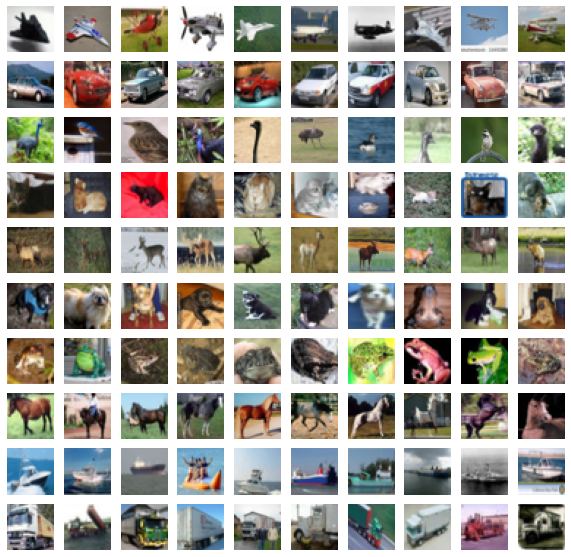

In [134]:
import numpy as np
import cv2 as cv

# imgs = Xtr['data']
# 指定图片大小，图像大小为20宽、5高的绘图(单位为英寸inch)
plt.figure(figsize=(10, 10))

# 打印100张图片信息
for i, imgs in enumerate(pict):
    img_path = "data/cifar10_dataset/train/"+pict[i]
    # print(img_path)
    img_bgr = cv.imread(img_path)
    img_rgb = cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB)
    # 将整个figure分成10行10列，绘制第i+1个子图。
    plt.subplot(10, 10, i+1)
    plt.imshow(img_rgb)
    plt.axis('off')

## 反序列化测试集内容

In [56]:
Test = unpickle('./data/cifar-10-batches-py/test_batch')

In [58]:
Test.keys()

dict_keys(['batch_label', 'labels', 'data', 'filenames'])

In [69]:
import types

print(type(Test['batch_label']), type(Test['labels']), type(Test['data']), type(Test['filenames']))

<class 'str'> <class 'list'> <class 'numpy.ndarray'> <class 'list'>


In [60]:
Test['batch_label']

'testing batch 1 of 1'

In [62]:
Test['labels'][0:10]

[3, 8, 8, 0, 6, 6, 1, 6, 3, 1]

In [70]:
Test['data'][0:10]

array([[158, 159, 165, ..., 124, 129, 110],
       [235, 231, 232, ..., 178, 191, 199],
       [158, 158, 139, ...,   8,   3,   7],
       ...,
       [ 83,  82,  81, ...,  22,  24,  22],
       [ 23,  19,  21, ..., 118, 123, 118],
       [217, 210, 205, ..., 204, 225, 223]], dtype=uint8)

In [65]:
Test['filenames'][0:10]

['domestic_cat_s_000907.png',
 'hydrofoil_s_000078.png',
 'sea_boat_s_001456.png',
 'jetliner_s_001705.png',
 'green_frog_s_001658.png',
 'crapaud_s_002124.png',
 'shooting_brake_s_000973.png',
 'green_frog_s_000634.png',
 'tabby_cat_s_001397.png',
 'wagon_s_002806.png']

In [71]:
len(Test['data'])

10000

## 创建测试集文件夹

In [157]:
!mkdir data/cifar10_dataset/val

## 保存测试集信息

In [141]:
from PIL import Image
import numpy as np
import pandas as pd
from tqdm import tqdm
import math
import matplotlib.pyplot as plt
%matplotlib inline
classes = Meta['label_names']
print(classes)

for i in range(Meta['num_cases_per_batch']-9995):
    for j, index in enumerate(Test.keys()):
        if j != 0:
            print(index, ": ", Test[f'{index}'][i])
        else:
            print(index, ": ", Test[f'{index}'][14:15])

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
batch_label :  1
labels :  3
data :  [158 159 165 ... 124 129 110]
filenames :  domestic_cat_s_000907.png
batch_label :  1
labels :  8
data :  [235 231 232 ... 178 191 199]
filenames :  hydrofoil_s_000078.png
batch_label :  1
labels :  8
data :  [158 158 139 ...   8   3   7]
filenames :  sea_boat_s_001456.png
batch_label :  1
labels :  0
data :  [155 167 176 ...  50  52  50]
filenames :  jetliner_s_001705.png
batch_label :  1
labels :  6
data :  [ 65  70  48 ... 136 146 117]
filenames :  green_frog_s_001658.png


In [152]:
from PIL import Image
import numpy as np
import pandas as pd
from tqdm import tqdm
import math
import matplotlib.pyplot as plt
%matplotlib inline
classes = Meta['label_names']
print(classes)

from_batch = []
path = []
labels_id = []
labels = []
data = []


for j in range(Meta['num_cases_per_batch']):
    for k, index in enumerate(Test.keys()):
        if index == 'batch_label':
            str = Test[f'{index}'][14:15]
            from_batch.append(str)
        elif index == 'labels':
            str = Test[f'{index}'][j]
            labels_id.append(str)
            str2 = Meta['label_names'][str]
            labels.append(str2)
        elif index == 'filenames':
            str2 = Test['labels'][j]
            str = "data/cifar10_dataset/val/"+Meta['label_names'][str2]+'/'+Test[f'{index}'][j]
            path.append(str)
        elif index == 'data':
            str = str = Test[f'{index}'][j]
            data.append(str)


# 定义一个pandas的表格来存放保存图像的信息
df_test = pd.DataFrame()
df_test['来自训练集batch'] = from_batch
df_test['图像路径'] = path
df_test['标注类别ID'] = labels_id
df_test['标注类别名称'] = labels
df_test['像素值'] = data

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [153]:
df_test.shape

(10000, 5)

In [154]:
df_test

,来自训练集batch,图像路径,标注类别ID,标注类别名称,像素值
0,1,data/cifar10_dataset/val/cat/domestic_cat_s_00...,3,cat,"[158, 159, 165, 166, 160, 156, 162, 159, 158, ..."
1,1,data/cifar10_dataset/val/ship/hydrofoil_s_0000...,8,ship,"[235, 231, 232, 232, 232, 232, 232, 232, 232, ..."
2,1,data/cifar10_dataset/val/ship/sea_boat_s_00145...,8,ship,"[158, 158, 139, 132, 166, 182, 187, 193, 199, ..."
3,1,data/cifar10_dataset/val/airplane/jetliner_s_0...,0,airplane,"[155, 167, 176, 190, 177, 166, 168, 166, 170, ..."
4,1,data/cifar10_dataset/val/frog/green_frog_s_001...,6,frog,"[65, 70, 48, 30, 23, 40, 44, 45, 45, 40, 10, 1..."
...,...,...,...,...,...
9995,1,data/cifar10_dataset/val/ship/cabin_cruiser_s_...,8,ship,"[76, 76, 77, 76, 75, 76, 76, 76, 76, 78, 81, 8..."
9996,1,data/cifar10_dataset/val/cat/tabby_cat_s_00049...,3,cat,"[81, 91, 98, 106, 108, 110, 80, 84, 88, 90, 92..."
9997,1,data/cifar10_dataset/val/dog/pekinese_s_002005...,5,dog,"[20, 19, 15, 15, 14, 13, 12, 11, 10, 9, 8, 8, ..."
9998,1,data/cifar10_dataset/val/automobile/convertibl...,1,automobile,"[25, 15, 23, 17, 23, 51, 74, 91, 114, 137, 90,..."


In [155]:
df_test.to_csv('cifar10_测试集内容.csv', index=False)

## 新建测试集各类文件夹

In [158]:
!mkdir data/cifar10_dataset/val/airplane data/cifar10_dataset/val/automobile data/cifar10_dataset/val/bird 

In [159]:
!mkdir data/cifar10_dataset/val/cat data/cifar10_dataset/val/deer data/cifar10_dataset/val/dog

In [160]:
!mkdir data/cifar10_dataset/val/frog data/cifar10_dataset/val/horse data/cifar10_dataset/val/ship data/cifar10_dataset/val/truck

## 开始保存测试集图片信息（大致7分钟）

In [161]:
# # pillow保存为.jpg格式图片
from PIL import Image

for j in range(Meta['num_cases_per_batch']):
    for k, index in enumerate(Test.keys()):
        img = np.reshape(df_test['像素值'][j], (3, 32, 32))
        img = img.transpose(1, 2, 0)
        img = Image.fromarray(img)
        img.save(f"{df_test['图像路径'][j]}")

## 查看已经完成训练集保存的内容

In [162]:
# 查看导入的测试集文件数量
!ls -lR ./data/cifar10_dataset/val | grep "^-" | wc -l

10000


In [163]:
# 查看导入的测试集文件数量
!ls -lR ./data/cifar10_dataset/val/airplane | grep "^-" | wc -l

1000


In [164]:
# 查看导入的测试集文件数量
!ls -lR ./data/cifar10_dataset/val/dog | grep "^-" | wc -l

1000


# 开始模型训练部分

## 配置环境

In [165]:
!pip install openmim mmengine

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     |████████████████████████████████| 51 kB 2.5 MB/s  eta 0:00:01
     |████████████████████████████████| 331 kB 33.8 MB/s eta 0:00:01
     |████████████████████████████████| 239 kB 55.1 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 48.3 MB/s eta 0:00:01
     |████████████████████████████████| 84 kB 42.7 MB/s eta 0:00:01
  Attempting uninstall: pygments
    Found existing installation: Pygments 2.10.0
    Uninstalling Pygments-2.10.0:
      Successfully uninstalled Pygments-2.10.0


In [166]:
!mim install  mmcv-full mmcls

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Looking in links: https://download.openmmlab.com/mmcv/dist/cu113/torch1.10.0/index.html
     |████████████████████████████████| 58.2 MB 4.5 MB/s eta 0:00:01    |████▍                           | 8.0 MB 2.6 MB/s eta 0:00:19     |███████████████████▎            | 35.1 MB 3.5 MB/s eta 0:00:07     |█████████████████████████▉      | 47.1 MB 2.2 MB/s eta 0:00:06     |████████████████████████████████| 58.2 MB 4.5 MB/s eta 0:00:01
     |████████████████████████████████| 648 kB 35.2 MB/s eta 0:00:01


## 验证是否安装成功

In [167]:
import mmcv
import mmcls

/environment/miniconda3/lib/python3.7/site-packages/mmcv/__init__.py:21: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  'On January 1, 2023, MMCV will release v2.0.0, in which it will remove '


## 下载一个训练好的模型

In [168]:
!mim download mmcls --config mobilenet-v2_8xb32_in1k --dest .

processing mobilenet-v2_8xb32_in1k...
mobilenet_v2_batch256_imagenet_20200708-3b2dc3af.pth exists in /home/featurize/work/OpenMMlab_AI_2023.2/run
Successfully dumped mobilenet-v2_8xb32_in1k.py to /home/featurize/work/OpenMMlab_AI_2023.2/run


## 复制一个配置文件用于做自己的任务

In [169]:
cp mobilenet-v2_8xb32_in1k.py mobilenet-v2_cifar10.py

## 修改模型配置文件

In [170]:
model = dict(
    type='ImageClassifier',
    backbone=dict(type='MobileNetV2', widen_factor=1.0),
    neck=dict(type='GlobalAveragePooling'),
    head=dict(
        type='LinearClsHead',
        num_classes=10,
        in_channels=1280,
        loss=dict(type='CrossEntropyLoss', loss_weight=1.0),
        topk=(1, 5)))

load_from = 'mobilenet_v2_batch256_imagenet_20200708-3b2dc3af.pth'

data = dict(
    samples_per_gpu=32,
    workers_per_gpu=2,
    train=dict(
        type='CustomDataset',
        data_prefix='data/cifar10_dataset/train',
        pipeline=[
            dict(type='LoadImageFromFile'),
            dict(type='RandomResizedCrop', size=224, backend='pillow'),
            dict(type='RandomFlip', flip_prob=0.5, direction='horizontal'),
            dict(
                type='Normalize',
                mean=[123.675, 116.28, 103.53],
                std=[58.395, 57.12, 57.375],
                to_rgb=True),
            dict(type='ImageToTensor', keys=['img']),
            dict(type='ToTensor', keys=['gt_label']),
            dict(type='Collect', keys=['img', 'gt_label'])
        ]),
    val=dict(
        type='CustomDataset',
        data_prefix='data/cifar10_dataset/val',
        pipeline=[
            dict(type='LoadImageFromFile'),
            dict(type='Resize', size=(256, -1), backend='pillow'),
            dict(type='CenterCrop', crop_size=224),
            dict(
                type='Normalize',
                mean=[123.675, 116.28, 103.53],
                std=[58.395, 57.12, 57.375],
                to_rgb=True),
            dict(type='ImageToTensor', keys=['img']),
            dict(type='Collect', keys=['img'])
        ]),
    test=dict(
        type='CustomDataset',
        data_prefix='data/cifar10_dataset/val',
        pipeline=[
            dict(type='LoadImageFromFile'),
            dict(type='Resize', size=(256, -1), backend='pillow'),
            dict(type='CenterCrop', crop_size=224),
            dict(
                type='Normalize',
                mean=[123.675, 116.28, 103.53],
                std=[58.395, 57.12, 57.375],
                to_rgb=True),
            dict(type='ImageToTensor', keys=['img']),
            dict(type='Collect', keys=['img'])
        ]))

evaluation = dict(interval=1, metric='accuracy')
optimizer = dict(type='SGD', lr=0.005, momentum=0.9, weight_decay=4e-05)
optimizer_config = dict(grad_clip=None)
lr_config = dict(policy='step', gamma=0.98, step=1)
runner = dict(type='EpochBasedRunner', max_epochs=20)
checkpoint_config = dict(interval=10)
log_config = dict(interval=10, hooks=[dict(type='TextLoggerHook')])
dist_params = dict(backend='nccl')
log_level = 'INFO'
resume_from = None
workflow = [('train', 1)]


## 执行训练

In [172]:
!mim train mmcls mobilenet-v2_cifar10.py

/environment/miniconda3/lib/python3.7/site-packages/mmcv/__init__.py:21: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  'On January 1, 2023, MMCV will release v2.0.0, in which it will remove '
Training command is /environment/miniconda3/bin/python /environment/miniconda3/lib/python3.7/site-packages/mmcls/.mim/tools/train.py mobilenet-v2_cifar10.py --launcher none --gpus 1. 
/environment/miniconda3/lib/python3.7/site-packages/mmcv/__init__.py:21: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv.

# 对测试结果进行可视化

## 载入训练日志表格

In [4]:
log_path = 'work_dirs/mobilenet-v2_cifar10/20230206_203013.log.json'

with open(log_path, "r") as f:
    json_list = f.readlines()

In [5]:
df_log = pd.DataFrame()
for each in json_list[2:]:
    df_log = df_log.append(eval(each), ignore_index=True)

In [6]:
df_log

,mode,epoch,iter,lr,memory,data_time,loss,time,accuracy_top-1,accuracy_top-5
0,train,1.0,20.0,0.00500,2456.0,0.00315,1.88308,0.08872,NaN,NaN
1,train,1.0,30.0,0.00500,2456.0,0.00323,1.70164,0.08673,NaN,NaN
2,train,1.0,40.0,0.00500,2456.0,0.00294,1.68415,0.08554,NaN,NaN
3,train,1.0,50.0,0.00500,2456.0,0.00305,1.74114,0.08600,NaN,NaN
4,train,1.0,60.0,0.00500,2456.0,0.00337,1.47716,0.08621,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1564,train,10.0,1530.0,0.00417,2456.0,0.00313,0.49312,0.08593,NaN,NaN
1565,train,10.0,1540.0,0.00417,2456.0,0.00333,0.48689,0.08682,NaN,NaN
1566,train,10.0,1550.0,0.00417,2456.0,0.00294,0.53810,0.08719,NaN,NaN
1567,train,10.0,1560.0,0.00417,2456.0,0.00354,0.47040,0.08665,NaN,NaN


可以看到最终的测试集top-1准确率达到了92.98%

In [7]:
df_train = df_log[df_log['mode']=='train']
df_test = df_log[df_log['mode']=='val']

df_train.to_csv('work_dirs/mobilenet-v2_cifar10/训练日志-训练集.csv', index=False)
df_test.to_csv('work_dirs/mobilenet-v2_cifar10/训练日志-测试集.csv', index=False)

## 可视化测试集损失函数

## 载入中文字体

In [1]:
# Linux操作系统，例如 云GPU平台：https://featurize.cn/?s=d7ce99f842414bfcaea5662a97581bd1
# 如果遇到 SSL 相关报错，重新运行本代码块即可
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf -O /environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
!rm -rf /home/featurize/.cache/matplotlib

import matplotlib
matplotlib.rc("font",family='SimHei') # 中文字体

--2023-02-06 21:03:56--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf
正在连接 172.16.0.13:5848... 已连接。
已发出 Proxy 请求，正在等待回应... 200 OK
长度： 10050868 (9.6M) [application/x-font-ttf]
正在保存至: “/environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf”

/environment/minico 100%[===================>]   9.58M  21.7MB/s    用时 0.4s    

2023-02-06 21:03:57 (21.7 MB/s) - 已保存 “/environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf” [10050868/10050868])



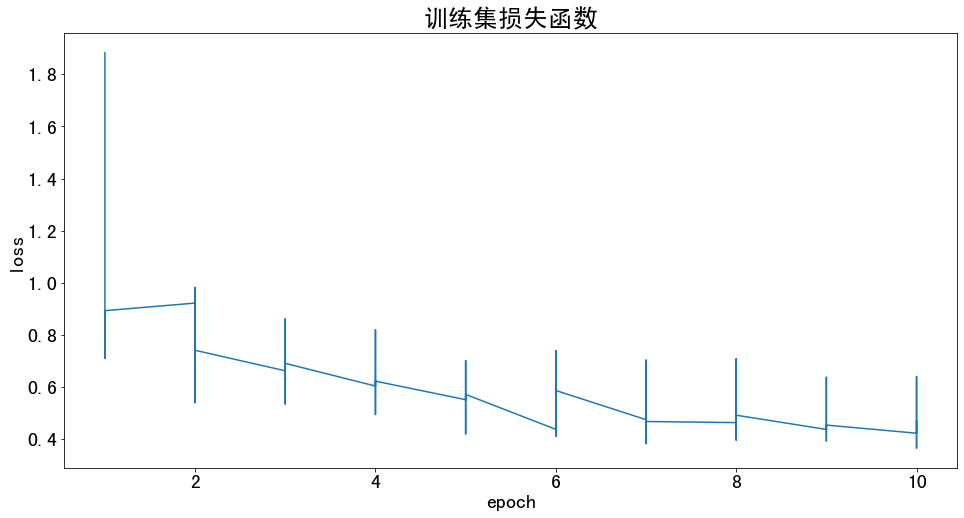

In [8]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline


plt.figure(figsize=(16, 8))

x = df_train['epoch']
y = df_train['loss']

plt.plot(x, y, label='训练集')

plt.tick_params(labelsize=20)
plt.xlabel('epoch', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('训练集损失函数', fontsize=25)
plt.savefig('work_dirs/mobilenet-v2_cifar10/训练集损失函数.pdf', dpi=120, bbox_inches='tight')

plt.show()

## 测试集评估指标

In [9]:
from matplotlib import colors as mcolors
import random
random.seed(124)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'black', 'indianred', 'brown', 'firebrick', 'maroon', 'darkred', 'red', 'sienna', 'chocolate', 'yellow', 'olivedrab', 'yellowgreen', 'darkolivegreen', 'forestgreen', 'limegreen', 'darkgreen', 'green', 'lime', 'seagreen', 'mediumseagreen', 'darkslategray', 'darkslategrey', 'teal', 'darkcyan', 'dodgerblue', 'navy', 'darkblue', 'mediumblue', 'blue', 'slateblue', 'darkslateblue', 'mediumslateblue', 'mediumpurple', 'rebeccapurple', 'blueviolet', 'indigo', 'darkorchid', 'darkviolet', 'mediumorchid', 'purple', 'darkmagenta', 'fuchsia', 'magenta', 'orchid', 'mediumvioletred', 'deeppink', 'hotpink']
markers = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_",0,1,2,3,4,5,6,7,8,9,10,11]
linestyle = ['--', '-.', '-']

def get_line_arg():
    '''
    随机产生一种绘图线型
    '''
    line_arg = {}
    line_arg['color'] = random.choice(colors)
    # line_arg['marker'] = random.choice(markers)
    line_arg['linestyle'] = random.choice(linestyle)
    line_arg['linewidth'] = random.randint(1, 4)
    # line_arg['markersize'] = random.randint(3, 5)
    return line_arg

In [18]:
metrics = ['accuracy_top-1', 'accuracy_top-5']

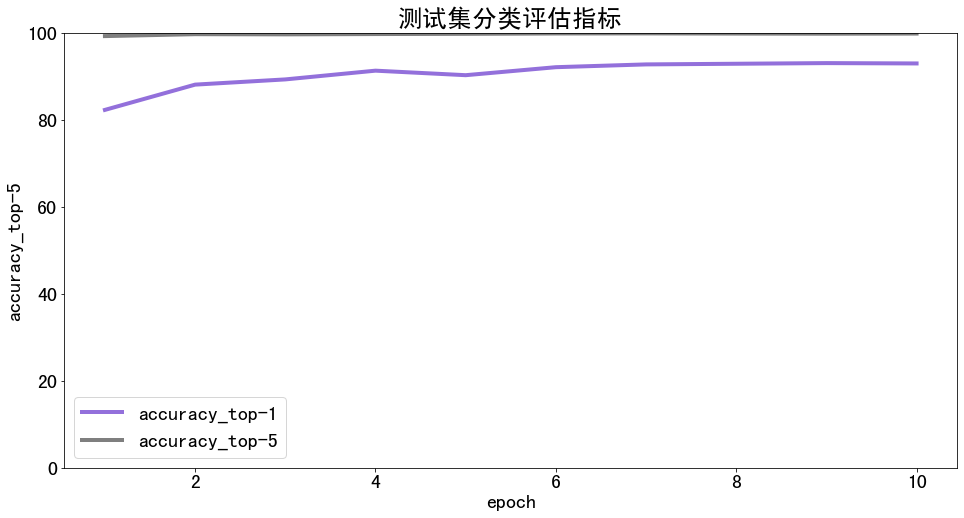

In [20]:
plt.figure(figsize=(16, 8))

x = df_test['epoch']
for y in metrics:
    plt.plot(x, df_test[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
plt.ylim([0, 100])
plt.xlabel('epoch', fontsize=20)
plt.ylabel(y, fontsize=20)
plt.title('测试集分类评估指标', fontsize=25)
plt.savefig('work_dirs/mobilenet-v2_cifar10/测试集分类评估指标.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()

In [21]:
import numpy as np
import pandas as pd
import cv2 as cv

In [33]:
Meta['label_names']

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

# 导入单张图片测试

load checkpoint from local path: work_dirs/mobilenet-v2_cifar10/latest.pth
{'pred_label': 0, 'pred_score': 0.9997956156730652, 'pred_class': 'airplane'}


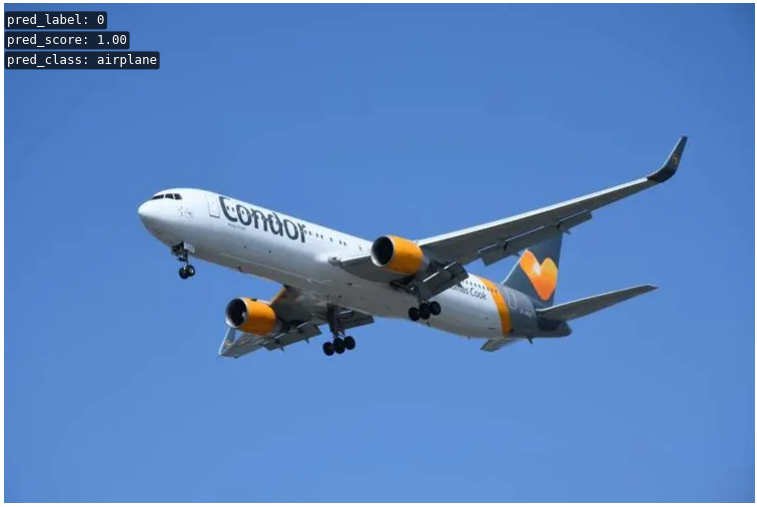

In [64]:
from mmcls.apis import init_model, inference_model
from mmcls.apis import show_result_pyplot

model = init_model('mobilenet-v2_cifar10.py', 'work_dirs/mobilenet-v2_cifar10/latest.pth')
result = inference_model(model, 'airplane.png')
print(result)
show_result_pyplot(model, 'airplane.png', result)

{'pred_label': 4, 'pred_score': 0.9999978542327881, 'pred_class': 'deer'}


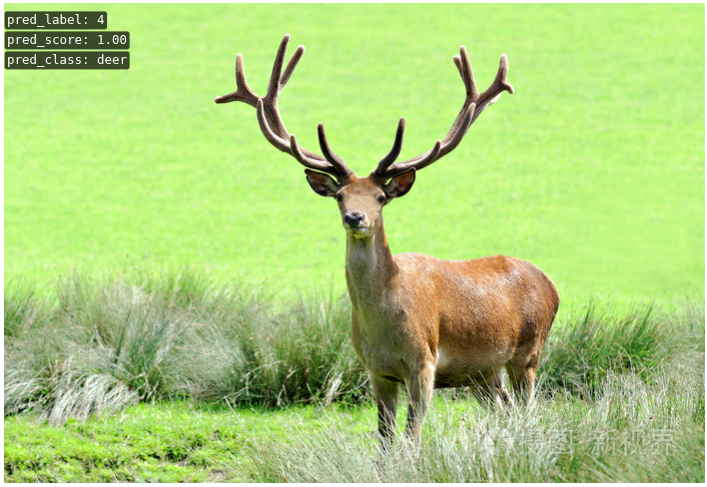

In [65]:
result = inference_model(model, 'deer.png')
print(result)
show_result_pyplot(model, 'deer.png', result)

# CAM热力图可视化（Grad-CAM）

In [66]:
import pandas as pd
import numpy as np

import torch

import cv2
from PIL import Image

import mmcv
from mmcls.apis import init_model, inference_model, show_result_pyplot

import matplotlib.pyplot as plt
%matplotlib inline

# 有 GPU 就用 GPU，没有就用 CPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('device', device)

device cuda:0


## 定义类别和索引一一映射

In [67]:
M = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [68]:
# 映射关系：类别 到 索引号

class_to_idx = {}
for i in range(len(Meta['label_names'])):
    class_to_idx[M[i]] = i
print(class_to_idx)

{'airplane': 0, 'automobile': 1, 'bird': 2, 'cat': 3, 'deer': 4, 'dog': 5, 'frog': 6, 'horse': 7, 'ship': 8, 'truck': 9}


In [69]:
# 映射关系：索引号 到 类别
idx_to_labels = {y:x for x,y in class_to_idx.items()}
idx_to_labels

{0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck'}

In [53]:
# 保存为本地的 npy 文件
np.save('cifar10_idx_to_labels.npy', idx_to_labels)
np.save('cifar10_labels_to_idx.npy', class_to_idx)

In [72]:
# 各类别对应索引
 # 0: 'airplane',
 # 1: 'automobile',
 # 2: 'bird',
 # 3: 'cat',
 # 4: 'deer',
 # 5: 'dog',
 # 6: 'frog',
 # 7: 'horse',
 # 8: 'ship',
 # 9: 'truck'

用python命令行指令执行Grad-CAM

In [75]:
pip install "grad-cam>=1.3.6"

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     |████████████████████████████████| 7.8 MB 34.4 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for grad-cam: filename=grad_cam-1.4.6-py3-none-any.whl size=38242 sha256=d96516ddabe012b994db40c40f6bdd44cdcd8b3f35527016e6326747361f0d9b
  Stored in directory: /home/featurize/.cache/pip/wheels/ef/9e/3b/3b5424be6825af39bae426c4359dba3094c7bb99dd73e9095c
Successfully built grad-cam
Note: you may need to restart the kernel to use updated packages.


In [76]:
!python ../../mmclassification/tools/visualizations/vis_cam.py \
        airplane.png \
        mobilenet-v2_cifar10.py \
        work_dirs/mobilenet-v2_cifar10/latest.pth \
        --target-category 0 \
        --method GradCAM \
        --save-path airplane_cam.jpg

/environment/miniconda3/lib/python3.7/site-packages/mmcv/__init__.py:21: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  'On January 1, 2023, MMCV will release v2.0.0, in which it will remove '
load checkpoint from local path: work_dirs/mobilenet-v2_cifar10/latest.pth
Automatically choose the last norm layer as target_layer.


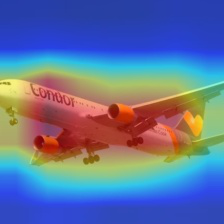

In [77]:
Image.open('airplane_cam.jpg')

In [78]:
!python ../../mmclassification/tools/visualizations/vis_cam.py \
        deer.png \
        mobilenet-v2_cifar10.py \
        work_dirs/mobilenet-v2_cifar10/latest.pth \
        --target-category 0 \
        --method GradCAM \
        --save-path deer_cam.jpg

/environment/miniconda3/lib/python3.7/site-packages/mmcv/__init__.py:21: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  'On January 1, 2023, MMCV will release v2.0.0, in which it will remove '
load checkpoint from local path: work_dirs/mobilenet-v2_cifar10/latest.pth
Automatically choose the last norm layer as target_layer.


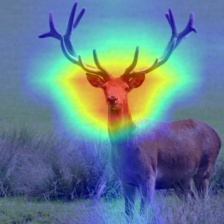

In [79]:
Image.open('deer_cam.jpg')